# **EDA On F1 Data**

### In this project, I aim to conduct fundamental analysis using Formula One data to demonstrate my Python data analysis skills, which I have acquired over the past month. As an enthusiast of Formula One, I find the prospect of working with the extensive data sets of this sport to be particularly stimulating. Specifically, I will utilize the F1 dataset "Formula 1 World Championship (1950 - 2022)", which is publicly available on Kaggle.

## **Importing Libraries**

In [82]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import numpy as np
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'


## **Loading the dataset**

In [83]:
!pip install opendatasets


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import opendatasets as od

In [85]:
dataset = 'https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020'

In [86]:
od.download(dataset)

Skipping, found downloaded files in ".\formula-1-world-championship-1950-2020" (use force=True to force download)


In [87]:
# Imorting the dataset
import os


In [88]:
#  Variable is used to specify the path to the directory where the data is located.
data_dir = './formula-1-world-championship-1950-2020'

In [89]:
os.listdir(data_dir)

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [90]:
# Loading the data into a Pandas DataFrame.
drivers_raw_df = pd.read_csv(f'{data_dir}/drivers.csv')
qualifying_raw_df = pd.read_csv(f'{data_dir}/qualifying.csv')
laptimes_raw_df = pd.read_csv(f'{data_dir}/lap_times.csv')
pitstops_raw_df = pd.read_csv(f'{data_dir}/pit_stops.csv')
constructor_standings_raw_df = pd.read_csv(f'{data_dir}/constructor_standings.csv')
seasons_raw_df = pd.read_csv(f'{data_dir}/seasons.csv')
circuits_raw_df = pd.read_csv(f'{data_dir}/circuits.csv')
constructors_raw_df = pd.read_csv(f'{data_dir}/constructors.csv')
driver_standings_raw_df = pd.read_csv(f'{data_dir}/driver_standings.csv')
results_raw_df = pd.read_csv(f'{data_dir}/results.csv')
status_raw_df = pd.read_csv(f'{data_dir}/status.csv')
races_raw_df = pd.read_csv(f'{data_dir}/races.csv')

### Now, let's take a look at the first few rows of the DataFrame to make sure the data was loaded correctly:

In [91]:
results_raw_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


### Basic info about the data

In [92]:
results_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

### Results data connects every other data frame as it has the key from other data frames.

### Making a copy of the data frames by dropping the columns that we are not going to use for analysis in this project. We will also rename the columns to be more specific.

In [93]:
races_df = races_raw_df.copy()
races_df = races_df.drop(columns = ['url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'])
races_df = races_df.rename(columns ={'name':'race_name'})

In [94]:
circuits_df = circuits_raw_df.copy()
circuits_df =circuits_df.drop(columns = ['lat', 'lng','alt', 'url'])
circuits_df = circuits_df.rename(columns={'name':'circuit_name', 'location':'city'})

In [95]:
drivers_df = drivers_raw_df.copy()
drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])

In [96]:
constructors_df=constructors_raw_df.copy()
constructors_df =constructors_df.drop(columns = ['url','constructorRef'])
constructors_df = constructors_df.rename(columns = {'name':'constructors_name'})

In [97]:
results_copy_df = results_raw_df.copy()

### Merging the data frames that we plan to use for getting a better picture

In [98]:
merged_df = results_copy_df.merge(status_raw_df , on = 'statusId')
merged_df = merged_df.merge(races_df, on = 'raceId')
merged_df = merged_df.merge(drivers_df, on = 'driverId')
merged_df = merged_df.merge(constructors_df, on = 'constructorId')
merged_df = merged_df.merge(circuits_df , on = 'circuitId')

In [99]:
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,date,dob,nationality_x,driver_name,constructors_name,nationality_y,circuitRef,circuit_name,city,country
0,1,18,1,1,22,1,1,1,1,10.0,...,2008-03-16,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,371,36,1,1,2,4,3,3,3,6.0,...,2007-03-18,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,7573,1,1,1,1,18,\N,D,20,0.0,...,2009-03-29,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
3,20352,338,1,1,2,11,6,6,6,8.0,...,2010-03-28,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
4,20780,841,1,1,3,2,2,2,2,18.0,...,2011-03-27,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia


In [100]:
merged_df = merged_df.rename(columns= {'nationality_x':'driver_nationality','nationality_y':'constructor_nationality'})

### Basic statistics of the DataFrame:

In [101]:
merged_df.describe()


,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074,1990.553144,8.368635,23.541488
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965,19.508665,4.949718,18.749739
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000,8.000000,18.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2023.000000,22.000000,79.000000


### We have to dig deep and be specific in our analysis 

## **Driver Analysis**

### Stripping the driver data from merged data frame year wise to get some insights.

### Driver Nationality

In [102]:
#  Group the merged data frame by the driver nationality column, then count the number of unique driver names in each group
driver_country = merged_df.groupby('driver_nationality').driver_name.nunique().reset_index() 

driver_country = driver_country.rename(columns = {'driver_name': 'driver_counts'})

# Create a new data frame driver_country1 that only includes rows where the driver_counts column is greater than or equal to 30. 
driver_country1 = driver_country[driver_country.driver_counts >= 30].sort_values('driver_counts' ,ascending = False )

# Add a new row to the driver_country1 data frame that represents all driver nationalities that are not included in the filtered data frame. 
driver_country1.loc[len(driver_country1.index)] = ['Others', (driver_country.driver_counts.sum() - driver_country1.driver_counts.sum())]

### Plotting a Pie chart to visualizes the distribution of drivers by nationality. 

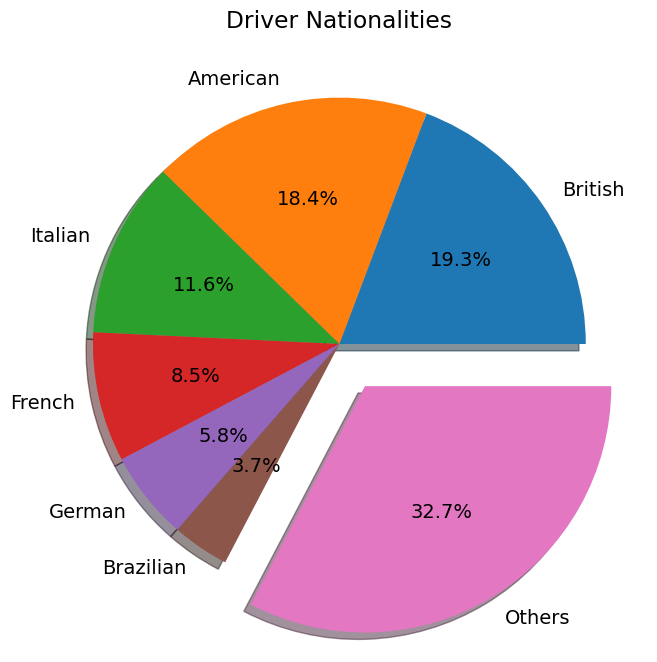

In [103]:
plt.title('Driver Nationalities')

myexplode = [0,0,0,0,0,0,0.2]

plt.pie(driver_country1.driver_counts, labels= driver_country1.driver_nationality, autopct='%1.1f%%', explode= myexplode, shadow=True, startangle=360 );

### Driver Performances 

In [104]:
# Extracting relevant information needed
driver_analysis_df = merged_df.groupby(['year','driver_name']).agg({'points': ['sum'],'raceId':['count'], 'positionOrder':['mean','std'] }).reset_index()


In [105]:
driver_analysis_df.head()

year      driver_name points raceId positionOrder          
                            sum  count          mean       std
0  1950   Alberto Ascari   11.0      5           8.6  7.765307
1  1950     Alfredo Pián    0.0      1          21.0       NaN
2  1950  Bayliss Levrett    0.0      1          27.0       NaN
3  1950    Bill Cantrell    0.0      1          27.0       NaN
4  1950     Bill Holland    6.0      1           2.0       NaN

### The resultant data frame has multilevel index and we will sort that out and rename the columns to perform more analysis

In [106]:
driver_analysis_df.columns = ['_'.join(col).strip() for col in driver_analysis_df.columns.values]
driver_analysis_df = driver_analysis_df.rename( columns = {'year_':'year', 'driver_name_' : 'driver_name'})

### With the above data frame lets get the driver with most points in each year which will get us the driver champion of that year.

In [107]:
champion_df= driver_analysis_df.groupby(['year', 'driver_name']).agg({'points_sum':sum}).reset_index()

C:\Users\Eashwar\AppData\Local\Temp\ipykernel_11328\4109070938.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  champion_df= driver_analysis_df.groupby(['year', 'driver_name']).agg({'points_sum':sum}).reset_index()


In [108]:
# Sorting by 'year' first ensures that the rows are ordered by year, while sorting by 'points_sum' within each year ensures that the driver with the highest points sum for each year appears first.
champion_df = champion_df.sort_values(['year','points_sum'], ascending = False).groupby('year').head(1)

### Champions of the last 20 Years 

In [109]:
print(champion_df[['year','driver_name']].head(20))

      year         driver_name
3178  2023      Max Verstappen
3155  2022      Max Verstappen
3133  2021      Max Verstappen
3112  2020      Lewis Hamilton
3090  2019      Lewis Hamilton
3068  2018      Lewis Hamilton
3047  2017      Lewis Hamilton
3026  2016        Nico Rosberg
2998  2015      Lewis Hamilton
2977  2014      Lewis Hamilton
2961  2013    Sebastian Vettel
2937  2012    Sebastian Vettel
2910  2011    Sebastian Vettel
2883  2010    Sebastian Vettel
2843  2009       Jenson Button
2825  2008      Lewis Hamilton
2800  2007      Kimi Räikkönen
2765  2006     Fernando Alonso
2741  2005     Fernando Alonso
2725  2004  Michael Schumacher


### Top 10 drivers with most number of race entries in Formula 1 history

In [110]:
most_races = merged_df.groupby('driver_name')[['raceId']].count().reset_index()
most_races = most_races.sort_values('raceId', ascending= False).head(10)
most_races = most_races.rename(columns ={'raceId': 'total_races'})


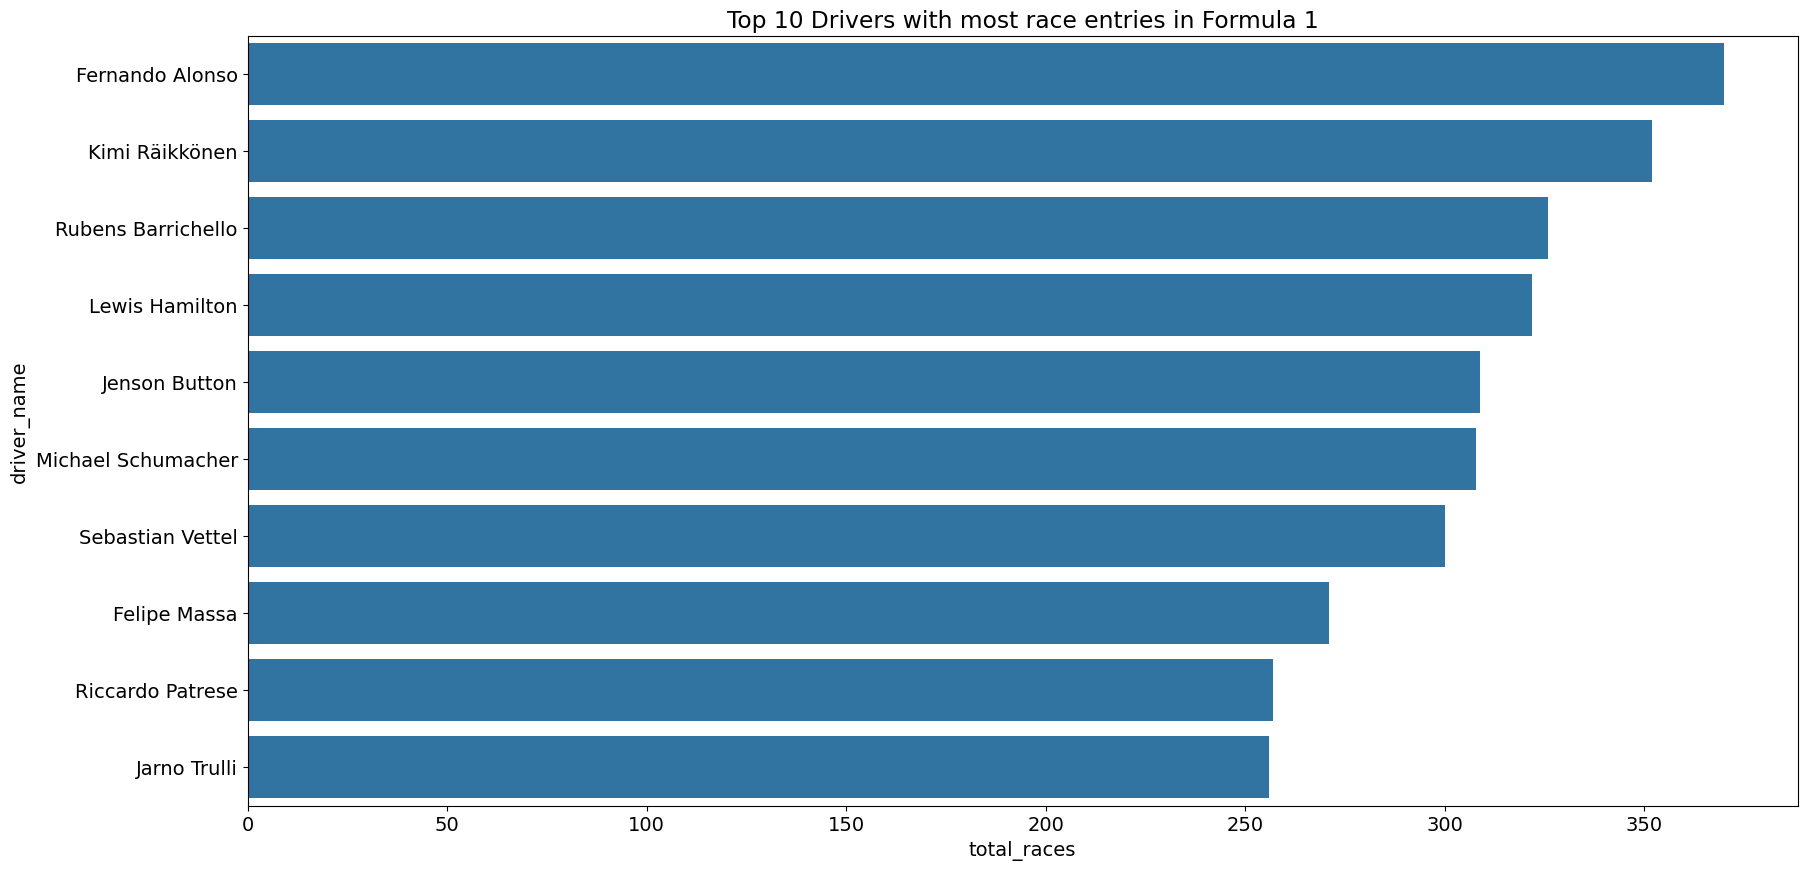

In [111]:
plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most race entries in Formula 1')
sns.barplot(x = 'total_races' , y = 'driver_name' , data = most_races );

### Top 10 drivers who has done most number of laps in Formula 1 history

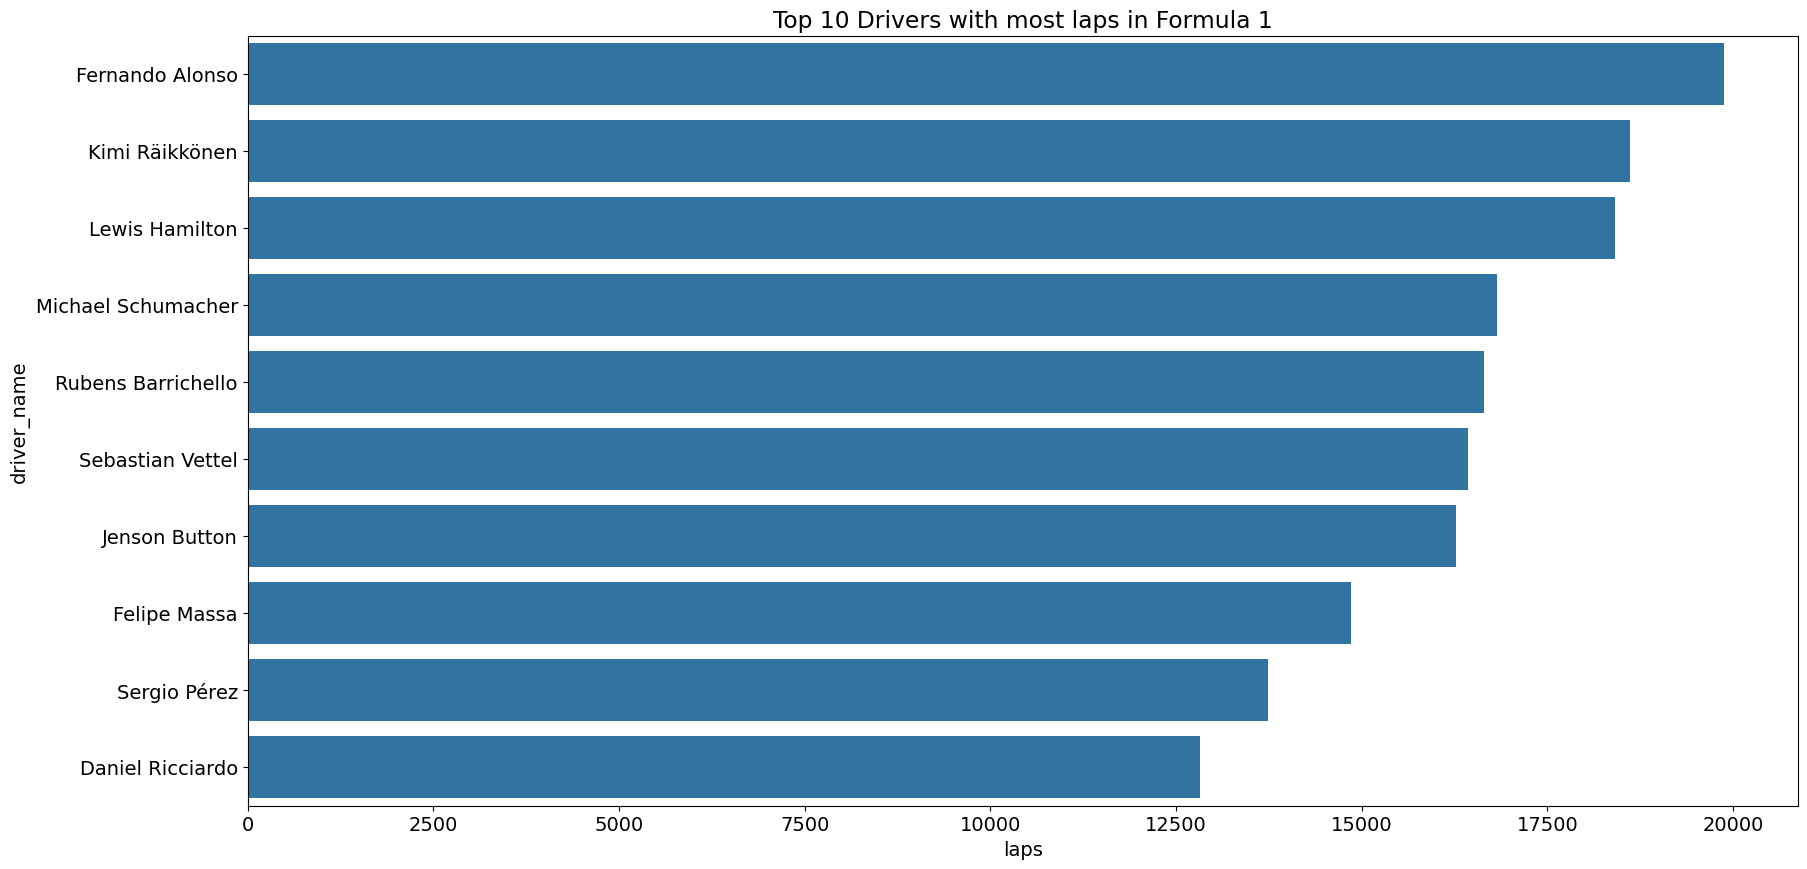

In [112]:
most_laps = merged_df.groupby('driver_name')[['laps']].sum().reset_index()
most_laps = most_laps.sort_values('laps', ascending = False).head(10)
 

plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most laps in Formula 1')
sns.barplot(x = 'laps' , y = 'driver_name' , data = most_laps );

### To compare drivers across different generations we will plot a graph using the average and standard deviation of positions finished by the drivers to see who was able to produce a more consistent performance.

In [113]:
# Retreiving the relavent data of position finished and narowwing down to drivers who has taken part in more than 100 races.

driver_analysis_df2 = merged_df.groupby('driver_name').agg({'raceId':['count'], 'positionOrder':['mean', 'std']}).reset_index()
driver_analysis_df2.columns = ['_'.join(col).strip() for col in driver_analysis_df2.columns.values]
driver_analysis_df2 = driver_analysis_df2[driver_analysis_df2.raceId_count > 100]
driver_analysis_df2 = driver_analysis_df2.sort_values('positionOrder_mean').head(10)
driver_analysis_df2 = driver_analysis_df2.rename(columns = {'driver_name_':'driver_name'})



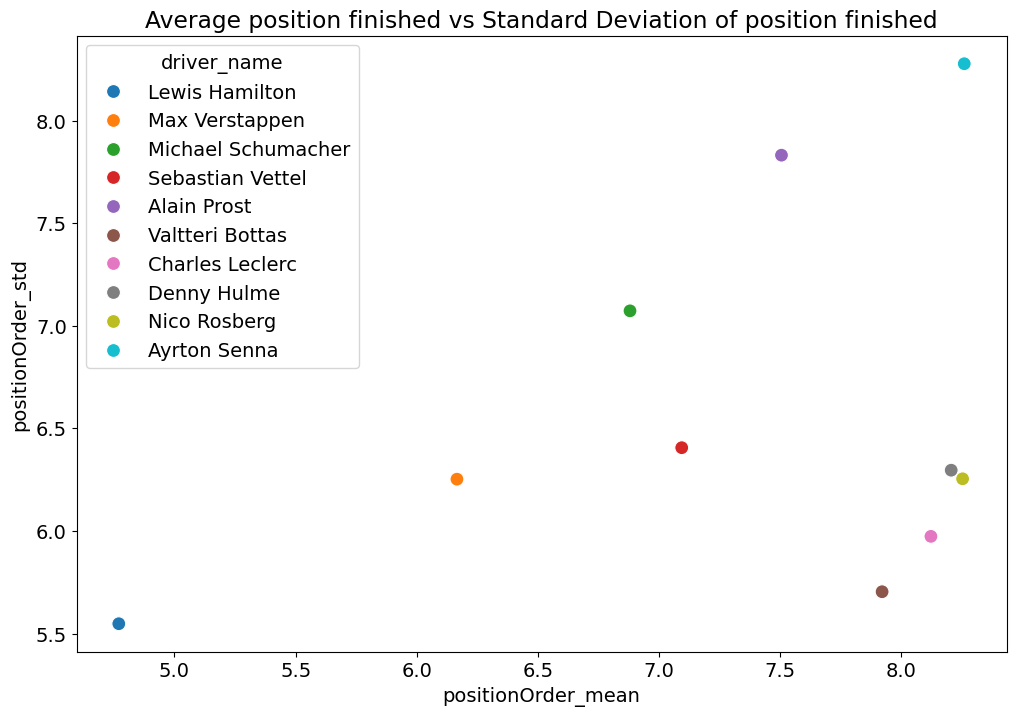

In [114]:
# Plotting a scatter plot with the above data 

plt.figure(figsize = (12,8))
plt.title('Average position finished vs Standard Deviation of position finished')
sns.scatterplot(x = 'positionOrder_mean' , y = 'positionOrder_std' , hue = 'driver_name' ,s=100 , data = driver_analysis_df2);

### From the graph we can see that Lewis Hamilton clearly stands out even among some of the top ten drivers of the world over the years. This graph shows his consistency of finishing in the top. The closest to him comes Max Verstappen closely followed by Michel Schumacher the fellow seven time world champion with Lewis . 

## **Constructor Analysis** 

### Now we will look into some data from constructors by extracting them from the merged data frame and performing a similar analysis to that of driver analysis.

### Counstructor Countries

In [115]:
constructor_country = merged_df.groupby('constructor_nationality').constructors_name.nunique().reset_index()

constructor_country = constructor_country.rename(columns ={'constructors_name':'constructor_counts'})

constructor_country1 = constructor_country[constructor_country.constructor_counts >= 9].sort_values('constructor_counts', ascending = False)

constructor_country1.loc[len(constructor_country1.index)+1] = ['Others', (constructor_country.constructor_counts.sum() - constructor_country1.constructor_counts.sum())]

### Plotting a Pie chart to visualizes the distribution of constructors by nationality.

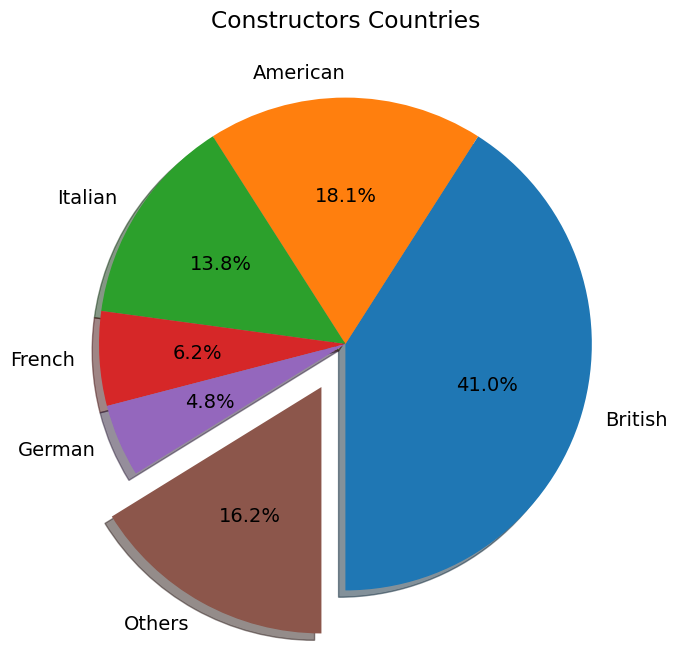

In [116]:
plt.title('Constructors Countries')

myexplode1 = [0,0,0,0,0,0.2]

plt.pie(constructor_country1.constructor_counts, labels = constructor_country1.constructor_nationality, autopct='%1.1f%%', explode= myexplode1, shadow=True, startangle=270);


In [117]:
con_analysis_df = merged_df.groupby(['year','constructors_name']).agg({'points': ['sum'],'raceId':['count'],'positionOrder':['mean','std'] }).reset_index()
con_analysis_df.columns = ['_'.join(col).strip() for col in con_analysis_df.columns.values]
con_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year_               1101 non-null   int64  
 1   constructors_name_  1101 non-null   object 
 2   points_sum          1101 non-null   float64
 3   raceId_count        1101 non-null   int64  
 4   positionOrder_mean  1101 non-null   float64
 5   positionOrder_std   971 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 51.7+ KB


In [118]:
con_analysis_df = con_analysis_df.rename(columns ={'year_':'year','constructors_name_':'constructors_name'})

### Getting Constructors champions year wise. 

In [119]:
con_champion_df= con_analysis_df.groupby(['year', 'constructors_name']).agg({'points_sum':sum}).reset_index()
con_champion_df = con_champion_df.sort_values(['year','points_sum'], ascending = False).groupby('year').head(1)

C:\Users\Eashwar\AppData\Local\Temp\ipykernel_11328\3590526064.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  con_champion_df= con_analysis_df.groupby(['year', 'constructors_name']).agg({'points_sum':sum}).reset_index()


### List of Constructors champions in the last 20 years 

In [120]:
con_champion_df[['year','constructors_name']].head(20)

,year,constructors_name
1099,2023,Red Bull
1089,2022,Red Bull
1078,2021,Mercedes
1066,2020,Mercedes
1055,2019,Mercedes
1045,2018,Mercedes
1035,2017,Mercedes
1025,2016,Mercedes
1015,2015,Mercedes
1005,2014,Mercedes


### In order to get the number of race entries by the constructors we have to group by constructors name and race ID and again group by constructors name as for every race the constructor enters two cars in its team name. We will also get average and standard deviation of positions finished to plot a graph.

In [121]:
con_analysis_df2 = merged_df.groupby(['constructors_name', 'raceId']).agg({'positionOrder':['mean', 'std']}).reset_index()

con_analysis_df2.columns = ['_'.join(col).strip() for col in con_analysis_df2.columns.values]

con_analysis_df3 = con_analysis_df2.groupby(['constructors_name_']).agg({'constructors_name_':['count'],'positionOrder_mean':['mean'] , 'positionOrder_std' :['mean']}).reset_index()

con_analysis_df3.columns = ['_'.join(col).strip() for col in con_analysis_df3.columns.values]

con_analysis_df3 = con_analysis_df3.rename(columns = {'constructors_name__' : 'constructors_name',
                                                      'constructors_name__count' : 'constructor_entry',
                                                      'positionOrder_mean_mean' : 'positionOrder_mean', 
                                                      'positionOrder_std_mean' : 'positionOrder_std'})

### Top 20 Constructors with most number of race entries over the years.

In [122]:
x = con_analysis_df3.sort_values('constructor_entry', ascending = False).head(20)


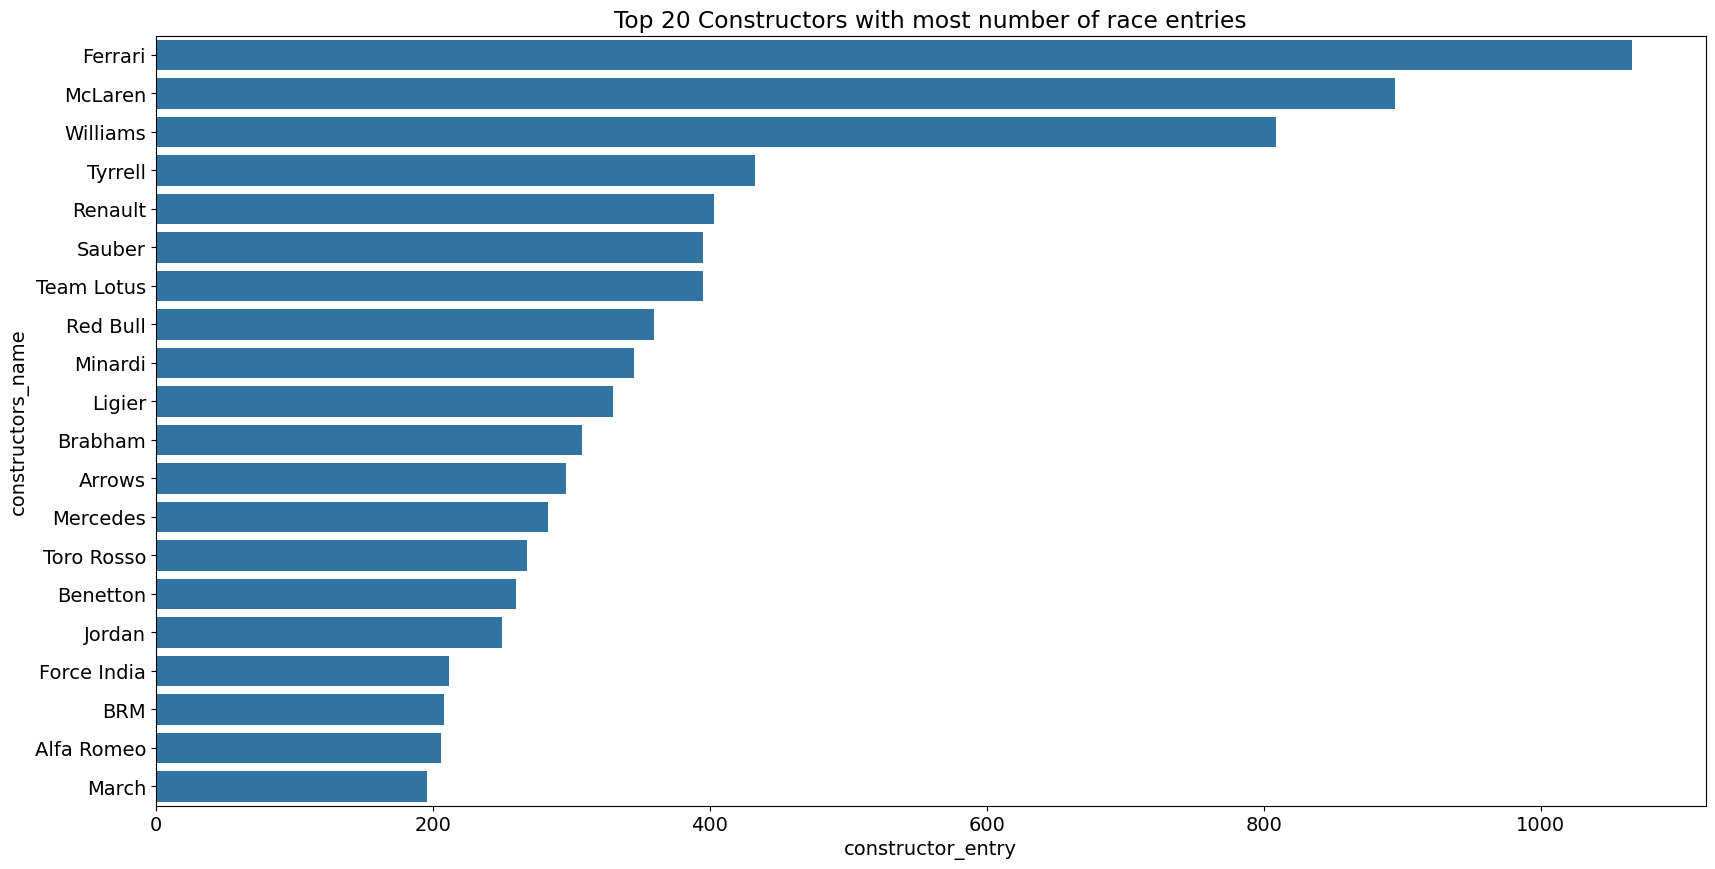

In [123]:
plt.figure(figsize = (20,10))
plt.title('Top 20 Constructors with most number of race entries')
sns.barplot(y = 'constructors_name' , x = 'constructor_entry' , data = x );

### For getting the top performing constructor we narrow down the constructors with at least 200 race entries and sort by their average position finishes. 

In [124]:
con_analysis_df3 = con_analysis_df3[con_analysis_df3.constructor_entry > 200]
con_analysis_df3 = con_analysis_df3.sort_values('positionOrder_mean').head(10)

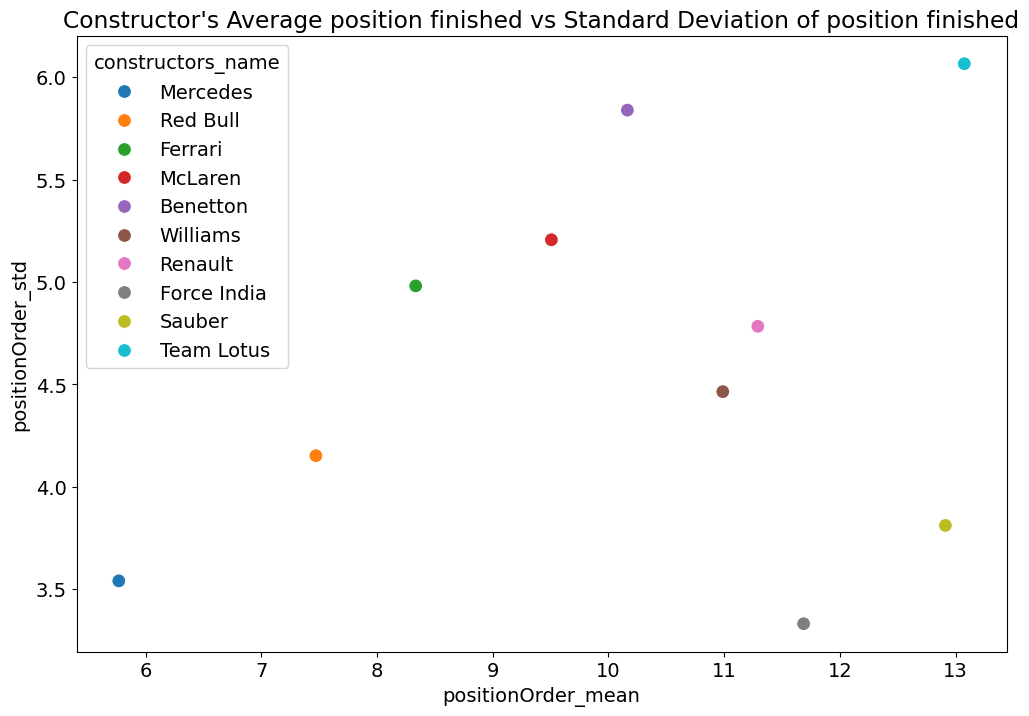

In [125]:
# Plotting a graph with the above data

plt.figure(figsize = (12,8))
plt.title("Constructor's Average position finished vs Standard Deviation of position finished")
sns.scatterplot(x = 'positionOrder_mean' , y = 'positionOrder_std' , hue = 'constructors_name' ,s=100 , data = con_analysis_df3);

### The provided graph illustrates the impressive results achieved by Mercedes within a short span of time. Notably, the driver analysis graph also showed consistent performance by Lewis Hamilton, who has been with Mercedes for the longest duration of eight years. This suggests a successful partnership between the right driver and the right team. Nico Rosberg and Valtteri Bottas, who were also drivers for Mercedes, showcased remarkable results, further emphasizing the team's dominance at the top.

### The graph also reveals that Ferrari closely follows Redbull and secures a position in the top three. Given Ferrari's extensive participation in Formula 1, with almost four times the number of entries compared to Mercedes, its consistent performance over 70 years is noteworthy. The driver analysis graph also features several prominent Ferrari drivers, such as Michael Schumacher, Fernando Alonso, Alain Prost, and Sebastian Vettel, who had a brief stint with the team and also drove for Redbull, another team in the top three according to the graph.

### It is evident that Mercedes, Ferrari, and Redbull, both in terms of drivers and constructors, dominate the analysis charts.

## **Circuit Analysis** 

### The analysis of circuits involves an examination of how lap times have evolved over the years, offering valuable insights into how car speeds have changed over time. Additionally, we will investigate the circuits that have hosted the greatest number of races in order to gain a comprehensive understanding of their historical significance and enduring popularity within the sport of Formula 1.

In [126]:
# Merging the data we require from different data frame

fastestlap_df = races_df.merge(circuits_df , on = 'circuitId')
fastestlap_df = fastestlap_df.merge(results_copy_df, on = 'raceId')

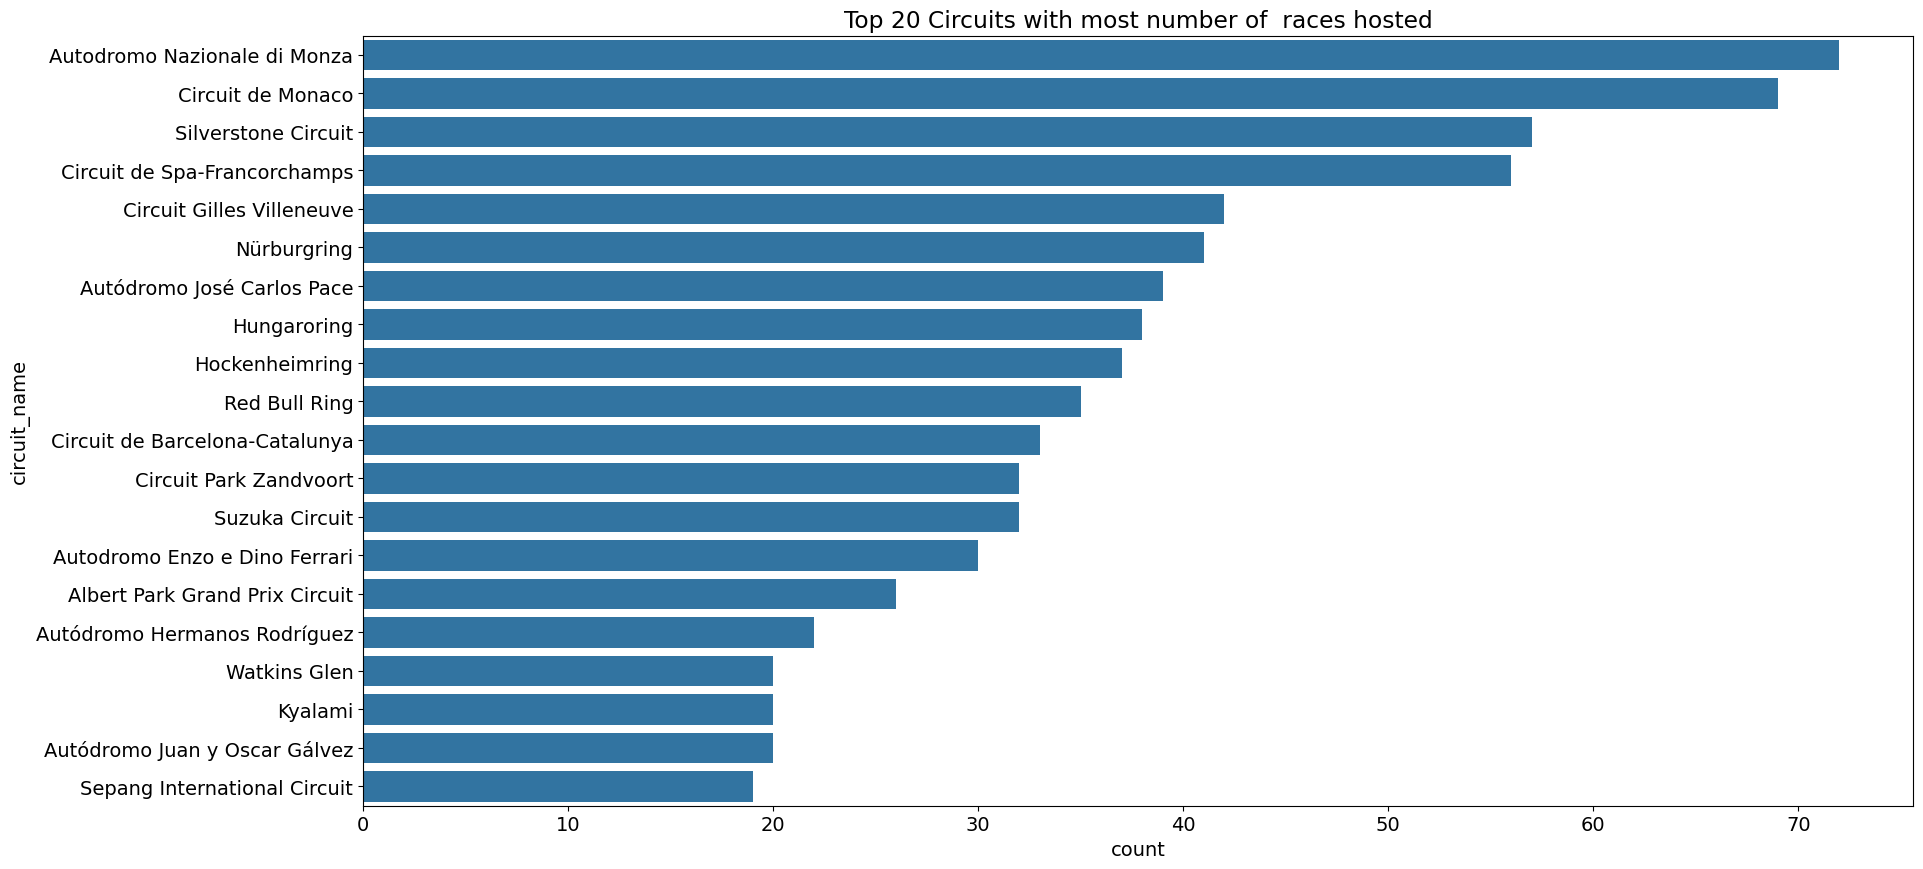

In [130]:
# For getting the data on number of times the circuits has hosted races
most_circuits = fastestlap_df.groupby(['year','circuit_name']).count().reset_index()

m = most_circuits['circuit_name'].value_counts().reset_index().head(20)
# m =  m.rename(columns ={'circuit_name': 'count', 'index': 'circuit_name'})

# Plotting a graph
plt.figure(figsize = (20,10))
plt.title('Top 20 Circuits with most number of  races hosted')
sns.barplot(y = 'circuit_name' , x = 'count' , data = m  );

### We will look at the fastest lap data in order to see how the speed of cars has changed over the years.

In [131]:
fastestlap_df['fastestLapTime']

0        1:28.020
1        1:29.066
2        1:28.916
3        1:28.416
4        1:28.712
           ...   
26075    1:31.736
26076    1:32.401
26077    1:31.562
26078    1:32.006
26079    1:32.384
Name: fastestLapTime, Length: 26080, dtype: object

### The fastest lap data is not in a format that can be used for analysis. In order to make it usable we are going to strip the data separately and convert it to numeric and add them together. 

In [132]:
fastestlap_df['f_lap_1'] = fastestlap_df['fastestLapTime'].apply(lambda x : (x.split('.')[-1]))
fastestlap_df['f_lap_2'] = fastestlap_df['fastestLapTime'].apply(lambda x : (x.split('.')[0]))
fastestlap_df['f_lap_3'] = fastestlap_df['f_lap_2'].apply(lambda x: (x.split(':')[-1]))
fastestlap_df['f_lap_4'] = fastestlap_df['f_lap_2'].apply(lambda x: (x.split(':')[0]))

In [133]:
# Removing empty spaces after stripping the data separately 

fastestlap_df['f_lap_1'] = fastestlap_df['f_lap_1'].str.strip()
fastestlap_df['f_lap_3'] = fastestlap_df['f_lap_3'].str.strip()
fastestlap_df['f_lap_4'] = fastestlap_df['f_lap_4'].str.strip()

In [134]:
# Converting them to a numeric value

fastestlap_df['f_lap_1'] = pd.to_numeric(fastestlap_df['f_lap_1'] , errors = 'coerce')
fastestlap_df['f_lap_3'] = pd.to_numeric(fastestlap_df['f_lap_3'] , errors = 'coerce')
fastestlap_df['f_lap_4'] = pd.to_numeric(fastestlap_df['f_lap_4'] , errors = 'coerce')

### Merging the data together again and we are merging in a way that we get the fastest lap in milliseconds as it will be easy to plot in a graph



In [135]:
fastestlap_df['fastest_lap'] = fastestlap_df['f_lap_1'] + fastestlap_df['f_lap_3']*1000 + fastestlap_df['f_lap_4']*60*1000



In [136]:
fastestlap_df.head()

,raceId,year,round,circuitId,race_name,date,circuitRef,circuit_name,city,country,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,f_lap_1,f_lap_2,f_lap_3,f_lap_4,fastest_lap
0,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,17,3,1:28.020,216.891,1,20.0,1:28,28.0,1.0,88020.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,43,14,1:29.066,214.344,1,66.0,1:29,29.0,1.0,89066.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,50,10,1:28.916,214.706,1,916.0,1:28,28.0,1.0,88916.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,53,6,1:28.416,215.920,1,416.0,1:28,28.0,1.0,88416.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,53,9,1:28.712,215.199,1,712.0,1:28,28.0,1.0,88712.0


In [137]:
fastestlap_df = fastestlap_df.drop(columns = ['f_lap_4','f_lap_3', 'f_lap_2','f_lap_1'])

In [138]:
x = fastestlap_df.sort_values('year')

x.isnull().sum()

raceId                 0
year                   0
round                  0
circuitId              0
race_name              0
date                   0
circuitRef             0
circuit_name           0
city                   0
country                0
resultId               0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
fastest_lap        18465
dtype: int64

### It seems like the fastest lap column has some null values in it.

In [139]:
x.groupby('year')[['fastest_lap']].max().head(10)

,fastest_lap
year,
1950,NaN
1951,NaN
1952,NaN
1953,NaN
1954,NaN
1955,NaN
1956,NaN
1957,NaN
1958,NaN


In [140]:
x.groupby('year')[['fastest_lap']].max().tail(10)

,fastest_lap
year,
2014,119505.0
2015,151939.0
2016,168804.0
2017,133579.0
2018,114320.0
2019,110451.0
2020,134103.0
2021,110850.0
2022,125585.0


In [141]:
# Getting the first valid row in fastest lap data

print(x.fastest_lap.first_valid_index())

15502


In [142]:
x.loc[123]

raceId                                         90
year                                         2004
round                                           1
circuitId                                       1
race_name                   Australian Grand Prix
date                                   2004-03-07
circuitRef                            albert_park
circuit_name       Albert Park Grand Prix Circuit
city                                    Melbourne
country                                 Australia
resultId                                     1532
driverId                                       17
constructorId                                  19
number                                         14
grid                                            6
position                                       \N
positionText                                    R
positionOrder                                  18
points                                        0.0
laps                                           29


### Fastest lap data is available only from the year 2004, so we will do analysis on fastest lap from year 2004 onwards.

In [143]:
fastestlap_df = fastestlap_df[(fastestlap_df['year'].between(2004,2022, inclusive = 'both'))]

### Circuits which has hosted the most number of races from 2004

In [144]:
h = fastestlap_df.groupby(['year','circuit_name']).count().reset_index()
h['circuit_name'].value_counts()

circuit_name
Hungaroring                             19
Autodromo Nazionale di Monza            19
Silverstone Circuit                     19
Circuit de Barcelona-Catalunya          19
Circuit de Spa-Francorchamps            18
Autódromo José Carlos Pace              18
Bahrain International Circuit           18
Circuit de Monaco                       18
Albert Park Grand Prix Circuit          17
Shanghai International Circuit          16
Circuit Gilles Villeneuve               16
Suzuka Circuit                          15
Yas Marina Circuit                      14
Sepang International Circuit            14
Marina Bay Street Circuit               13
Hockenheimring                          10
Circuit of the Americas                 10
Red Bull Ring                            9
Istanbul Park                            9
Nürburgring                              8
Sochi Autodrom                           8
Autódromo Hermanos Rodríguez             7
Autodromo Enzo e Dino Ferrari            

### Striping the data separately for 6 of the popular circuits that has hosted most number of races since 2004 

In [145]:
lap_time_monza = fastestlap_df[fastestlap_df['circuit_name'] == 'Autodromo Nazionale di Monza']
lap_time_monaco = fastestlap_df[fastestlap_df['circuit_name']== 'Circuit de Monaco']
lap_time_silverstone = fastestlap_df[fastestlap_df['circuit_name']== 'Silverstone Circuit']
lap_time_catalunya = fastestlap_df[fastestlap_df['circuit_name']=='Circuit de Barcelona-Catalunya']
lap_time_hungaroring = fastestlap_df[fastestlap_df['circuit_name']== 'Hungaroring']
lap_time_spa = fastestlap_df[fastestlap_df['circuit_name']== 'Circuit de Spa-Francorchamps']
lap_time_interlagos = fastestlap_df[fastestlap_df['circuit_name']== 'Autódromo José Carlos Pace']
lap_time_bahrain = fastestlap_df[fastestlap_df['circuit_name']== 'Bahrain International Circuit']
lap_time_melbourne = fastestlap_df[fastestlap_df['circuit_name']== 'Albert Park Grand Prix Circuit']

### Getting the fastest lap and grouping them by year

In [146]:
lap = lap_time_silverstone.groupby('year')[['fastest_lap']].min().reset_index()
lap1 =  lap_time_monaco.groupby('year')[['fastest_lap']].min().reset_index()
lap2 =  lap_time_monza.groupby('year')[['fastest_lap']].min().reset_index()
lap3 = lap_time_catalunya.groupby('year')[['fastest_lap']].min().reset_index()
lap4 = lap_time_hungaroring.groupby('year')[['fastest_lap']].min().reset_index()
lap5 = lap_time_spa.groupby('year')[['fastest_lap']].min().reset_index()
lap6 = lap_time_interlagos.groupby('year')[['fastest_lap']].min().reset_index()
lap7 = lap_time_bahrain.groupby('year')[['fastest_lap']].min().reset_index()
lap8 = lap_time_melbourne.groupby('year')[['fastest_lap']].min().reset_index()

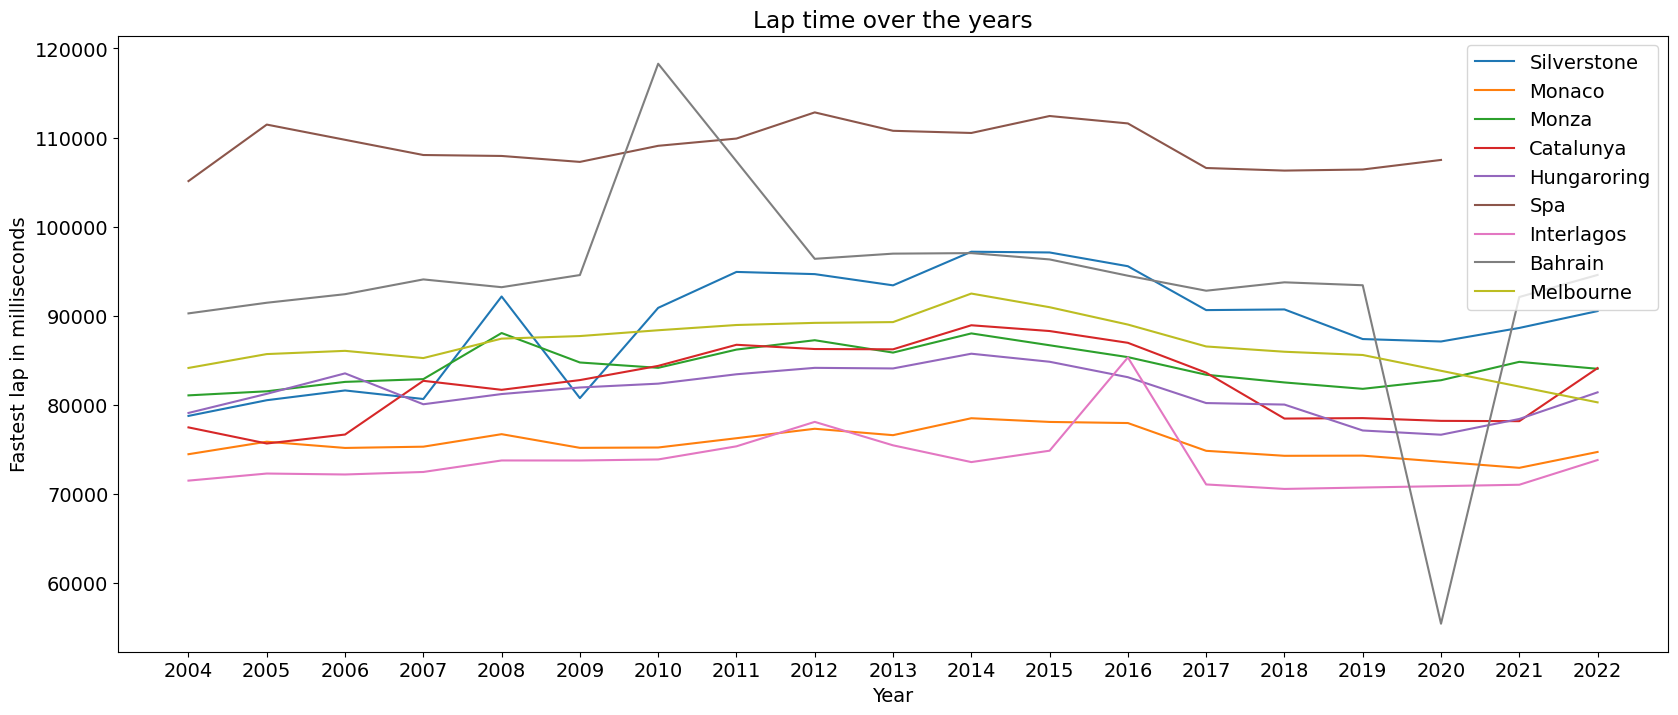

In [147]:
# Plotting a line graph for Lap time over the years

plt.figure(figsize = (20,8))
plt.plot(lap.year,lap.fastest_lap)
plt.plot(lap1.year,lap1.fastest_lap)
plt.plot(lap2.year,lap2.fastest_lap)
plt.plot(lap3.year,lap3.fastest_lap)
plt.plot(lap4.year,lap4.fastest_lap)
plt.plot(lap5.year,lap5.fastest_lap)
plt.plot(lap6.year,lap6.fastest_lap)
plt.plot(lap7.year,lap7.fastest_lap)
plt.plot(lap8.year,lap8.fastest_lap)
plt.xticks(np.arange(min(lap.year),max(lap.year)+1 , 1.0))
plt.ylabel('Fastest lap in milliseconds')
plt.xlabel('Year')
plt.title('Lap time over the years')
plt.legend(['Silverstone', 'Monaco','Monza','Catalunya','Hungaroring','Spa','Interlagos','Bahrain','Melbourne']);

### Individual graph for each circuits.

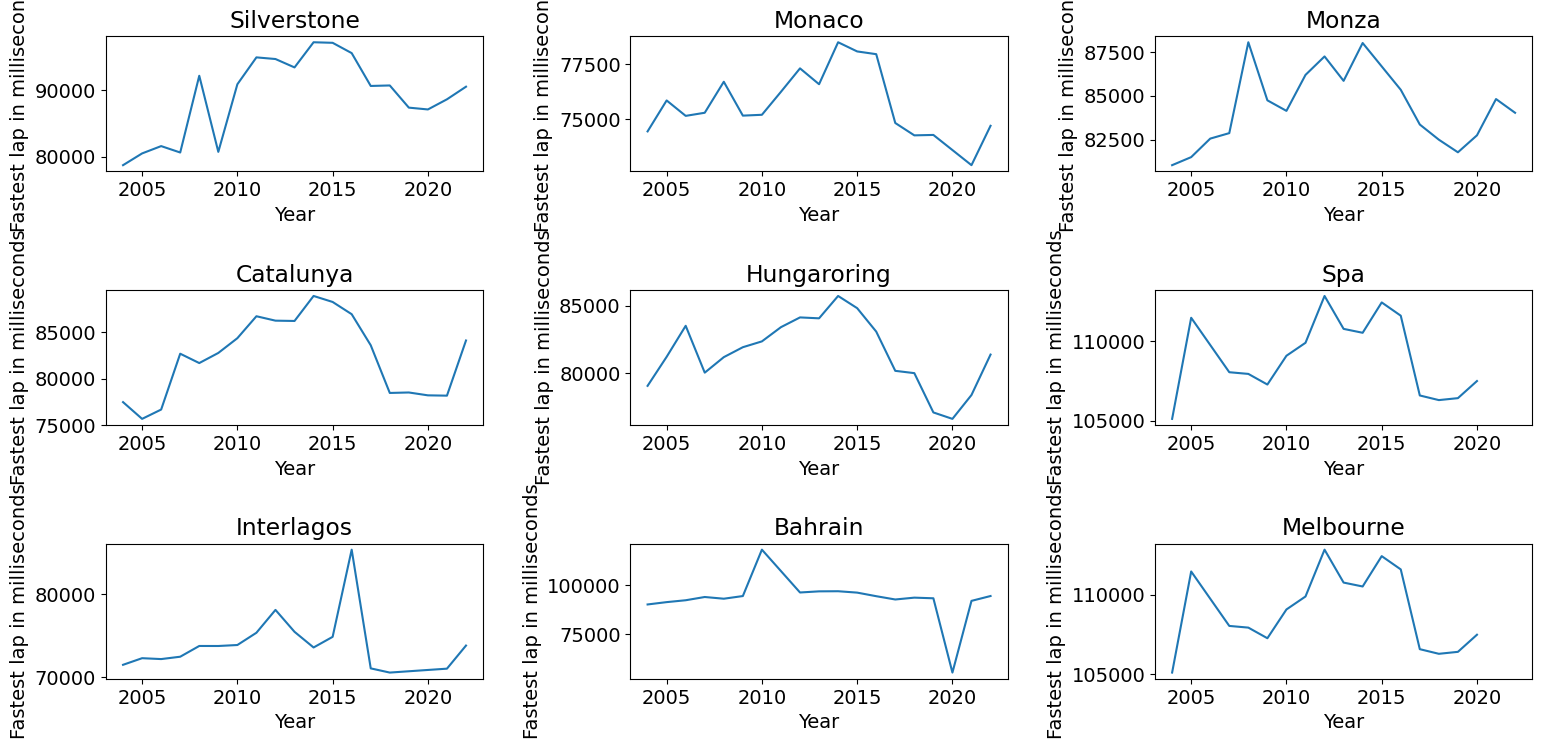

In [149]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))


axes[0,0].plot(lap.year,lap.fastest_lap)
axes[0,0].set_title('Silverstone')
axes[0,0].set_ylabel('Fastest lap in milliseconds')
axes[0,0].set_xlabel('Year');


axes[0,1].plot(lap1.year,lap1.fastest_lap)
axes[0,1].set_title('Monaco')
axes[0,1].set_ylabel('Fastest lap in milliseconds')
axes[0,1].set_xlabel('Year');

axes[0,2].plot(lap2.year,lap2.fastest_lap)
axes[0,2].set_title('Monza')
axes[0,2].set_ylabel('Fastest lap in milliseconds')
axes[0,2].set_xlabel('Year');

axes[1,0].plot(lap3.year,lap3.fastest_lap)
axes[1,0].set_title('Catalunya')
axes[1,0].set_ylabel('Fastest lap in milliseconds')
axes[1,0].set_xlabel('Year')

axes[1,1].plot(lap4.year,lap4.fastest_lap)
axes[1,1].set_title('Hungaroring')
axes[1,1].set_ylabel('Fastest lap in milliseconds')
axes[1,1].set_xlabel('Year');

axes[1,2].plot(lap5.year,lap5.fastest_lap)
axes[1,2].set_title('Spa')
axes[1,2].set_ylabel('Fastest lap in milliseconds')
axes[1,2].set_xlabel('Year');

axes[2,0].plot(lap6.year,lap6.fastest_lap)
axes[2,0].set_title('Interlagos')
axes[2,0].set_ylabel('Fastest lap in milliseconds')
axes[2,0].set_xlabel('Year');

axes[2,1].plot(lap7.year,lap7.fastest_lap)
axes[2,1].set_title('Bahrain')
axes[2,1].set_ylabel('Fastest lap in milliseconds')
axes[2,1].set_xlabel('Year');

axes[2,2].plot(lap5.year,lap5.fastest_lap)
axes[2,2].set_title('Melbourne')
axes[2,2].set_ylabel('Fastest lap in milliseconds')
axes[2,2].set_xlabel('Year');

plt.tight_layout(pad=2);


###  In the analysis of circuits, one of the key aspects is to examine how lap times have changed over the years, providing valuable insights into the evolution of car speeds. A common observation across all circuits is that cars were notably faster in 2004 and 2005, followed by a general increase in lap times until 2010. Further investigation is necessary to determine the reasons behind this trend, which may stem from various factors such as changes in technical and safety regulations or alterations to circuit layouts.

### Another interesting observation in all circuits is the pinnacle of highest lap time recorded in 2014, coinciding with the introduction of the hybrid era and significant changes to engine regulations. This marked a significant shift towards cleaner energy and the replacement of conventional 2.4-liter V-8 engines with new 1.6-liter V-6 power units equipped with an energy recovery system. However, this change initially resulted in an increase in lap times. Nevertheless, teams rapidly adapted to the new regulations, meticulously perfecting their cars to achieve greater speeds. Consequently, we can see a marked decrease in lap times every year following the peak in 2014, until 2022, where another major rule change occurred involving engine, aerodynamics and tire size.

## **Hybrid Era ( From 2014)**

### Finding the car that has the best reliabilty in hybrid era

In [150]:
# Extracting the data of hybrid era alone.

hybrid_era_results = merged_df[(merged_df['year'].between(2014,2022, inclusive = 'both'))]

In [151]:
hybrid_era_results.positionText.unique()

array(['R', '5', '3', '11', '14', '6', '2', 'W', '13', '9', '12', '1',
       '4', '8', '17', '10', '16', '15', '7', 'D', 'N', '18', '19', '20',
       '21', '22', 'E'], dtype=object)

In [152]:
# Getting the number of races finished by the constructor by using the to numeric function as reliability issues and represented in text form.


races_finished = pd.to_numeric(hybrid_era_results['positionText'], errors = 'coerce').groupby(hybrid_era_results['constructors_name']).count()
races_finished = races_finished.reset_index()

In [153]:
# Total number of race entries by the constructor 

races_entries = hybrid_era_results.groupby('constructors_name')[['raceId']].count().reset_index()

entries_finishes = races_finished.merge(races_entries, on = 'constructors_name')

entries_finishes = entries_finishes.rename(columns ={'positionText': 'races_finished', 'raceId': 'total_entries'})

# Calculating the reliability percentage 

entries_finishes['reliablility'] =  (entries_finishes['races_finished']/entries_finishes['total_entries'])*100



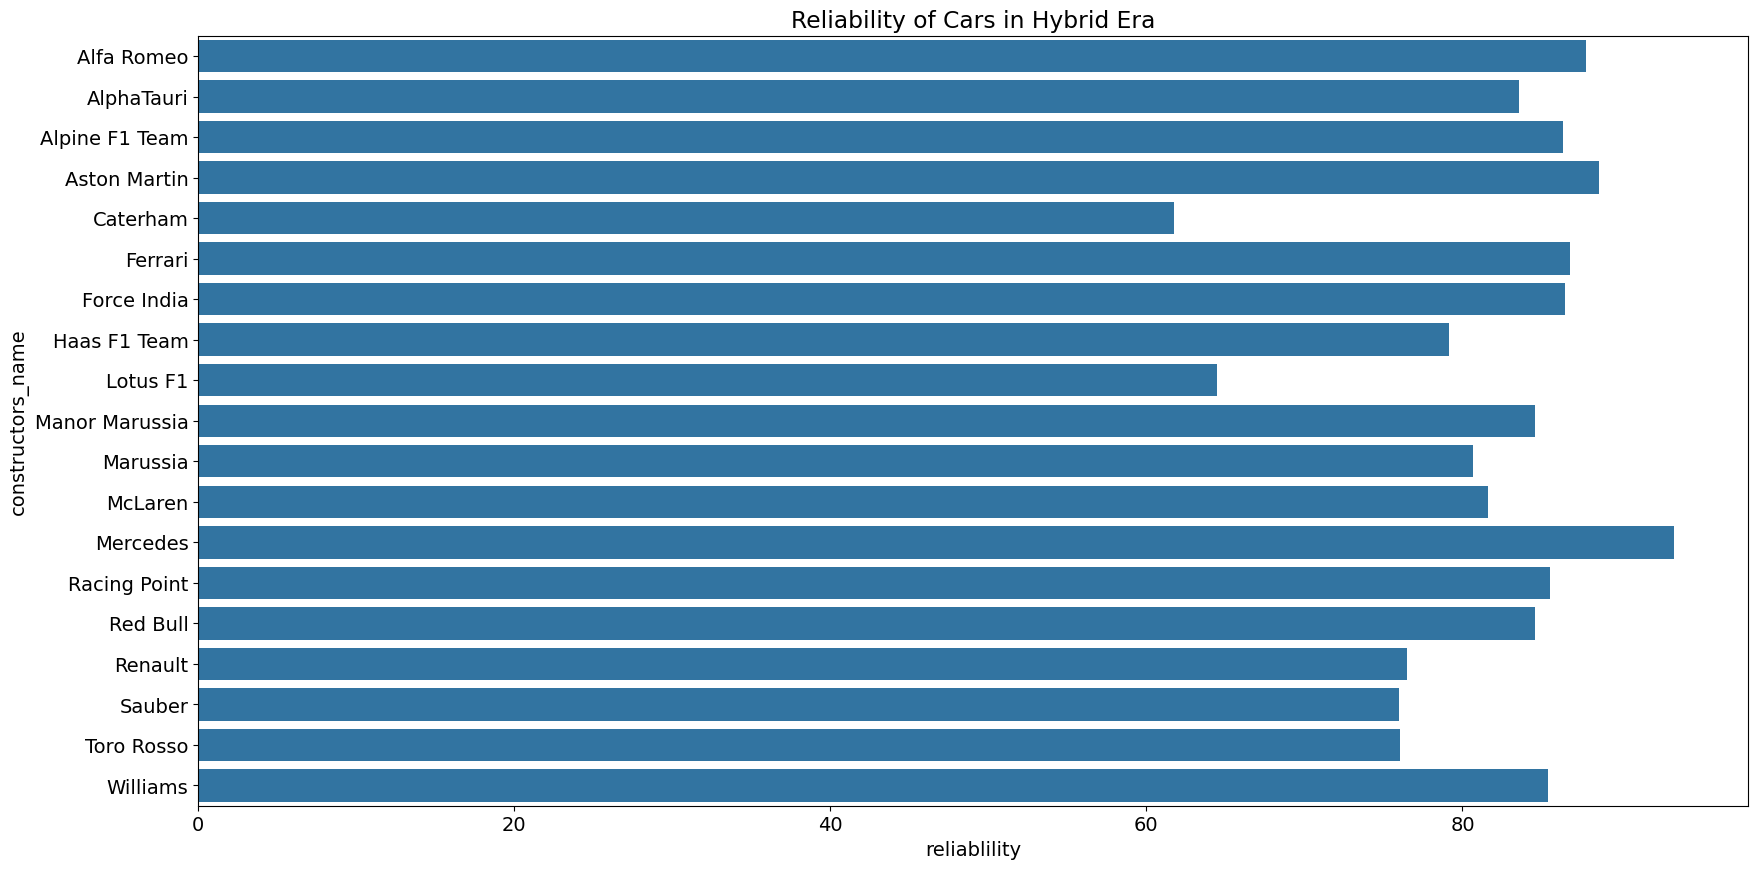

In [154]:
# Plotting a graph  

plt.figure(figsize = (20,10))
plt.title('Reliability of Cars in Hybrid Era')
a =sns.barplot(x= 'reliablility', y  = 'constructors_name',data = entries_finishes);

### Mercedes is the most reliable car closely followed by Alfa Romeo.

### Getting the distribution of points scored by drivers over the years in hybrid era.

In [155]:
hybrid_era_results1 =  pd.pivot_table(hybrid_era_results , index = 'driver_name', columns = 'year' , values = 'points' , aggfunc= np.sum)

C:\Users\Eashwar\AppData\Local\Temp\ipykernel_11328\2369459521.py:1: FutureWarning: The provided callable <function sum at 0x000002B4ADFEEA20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hybrid_era_results1 =  pd.pivot_table(hybrid_era_results , index = 'driver_name', columns = 'year' , values = 'points' , aggfunc= np.sum)


<Axes: title={'center': 'Points by drivers in hybrid era'}, xlabel='year', ylabel='driver_name'>

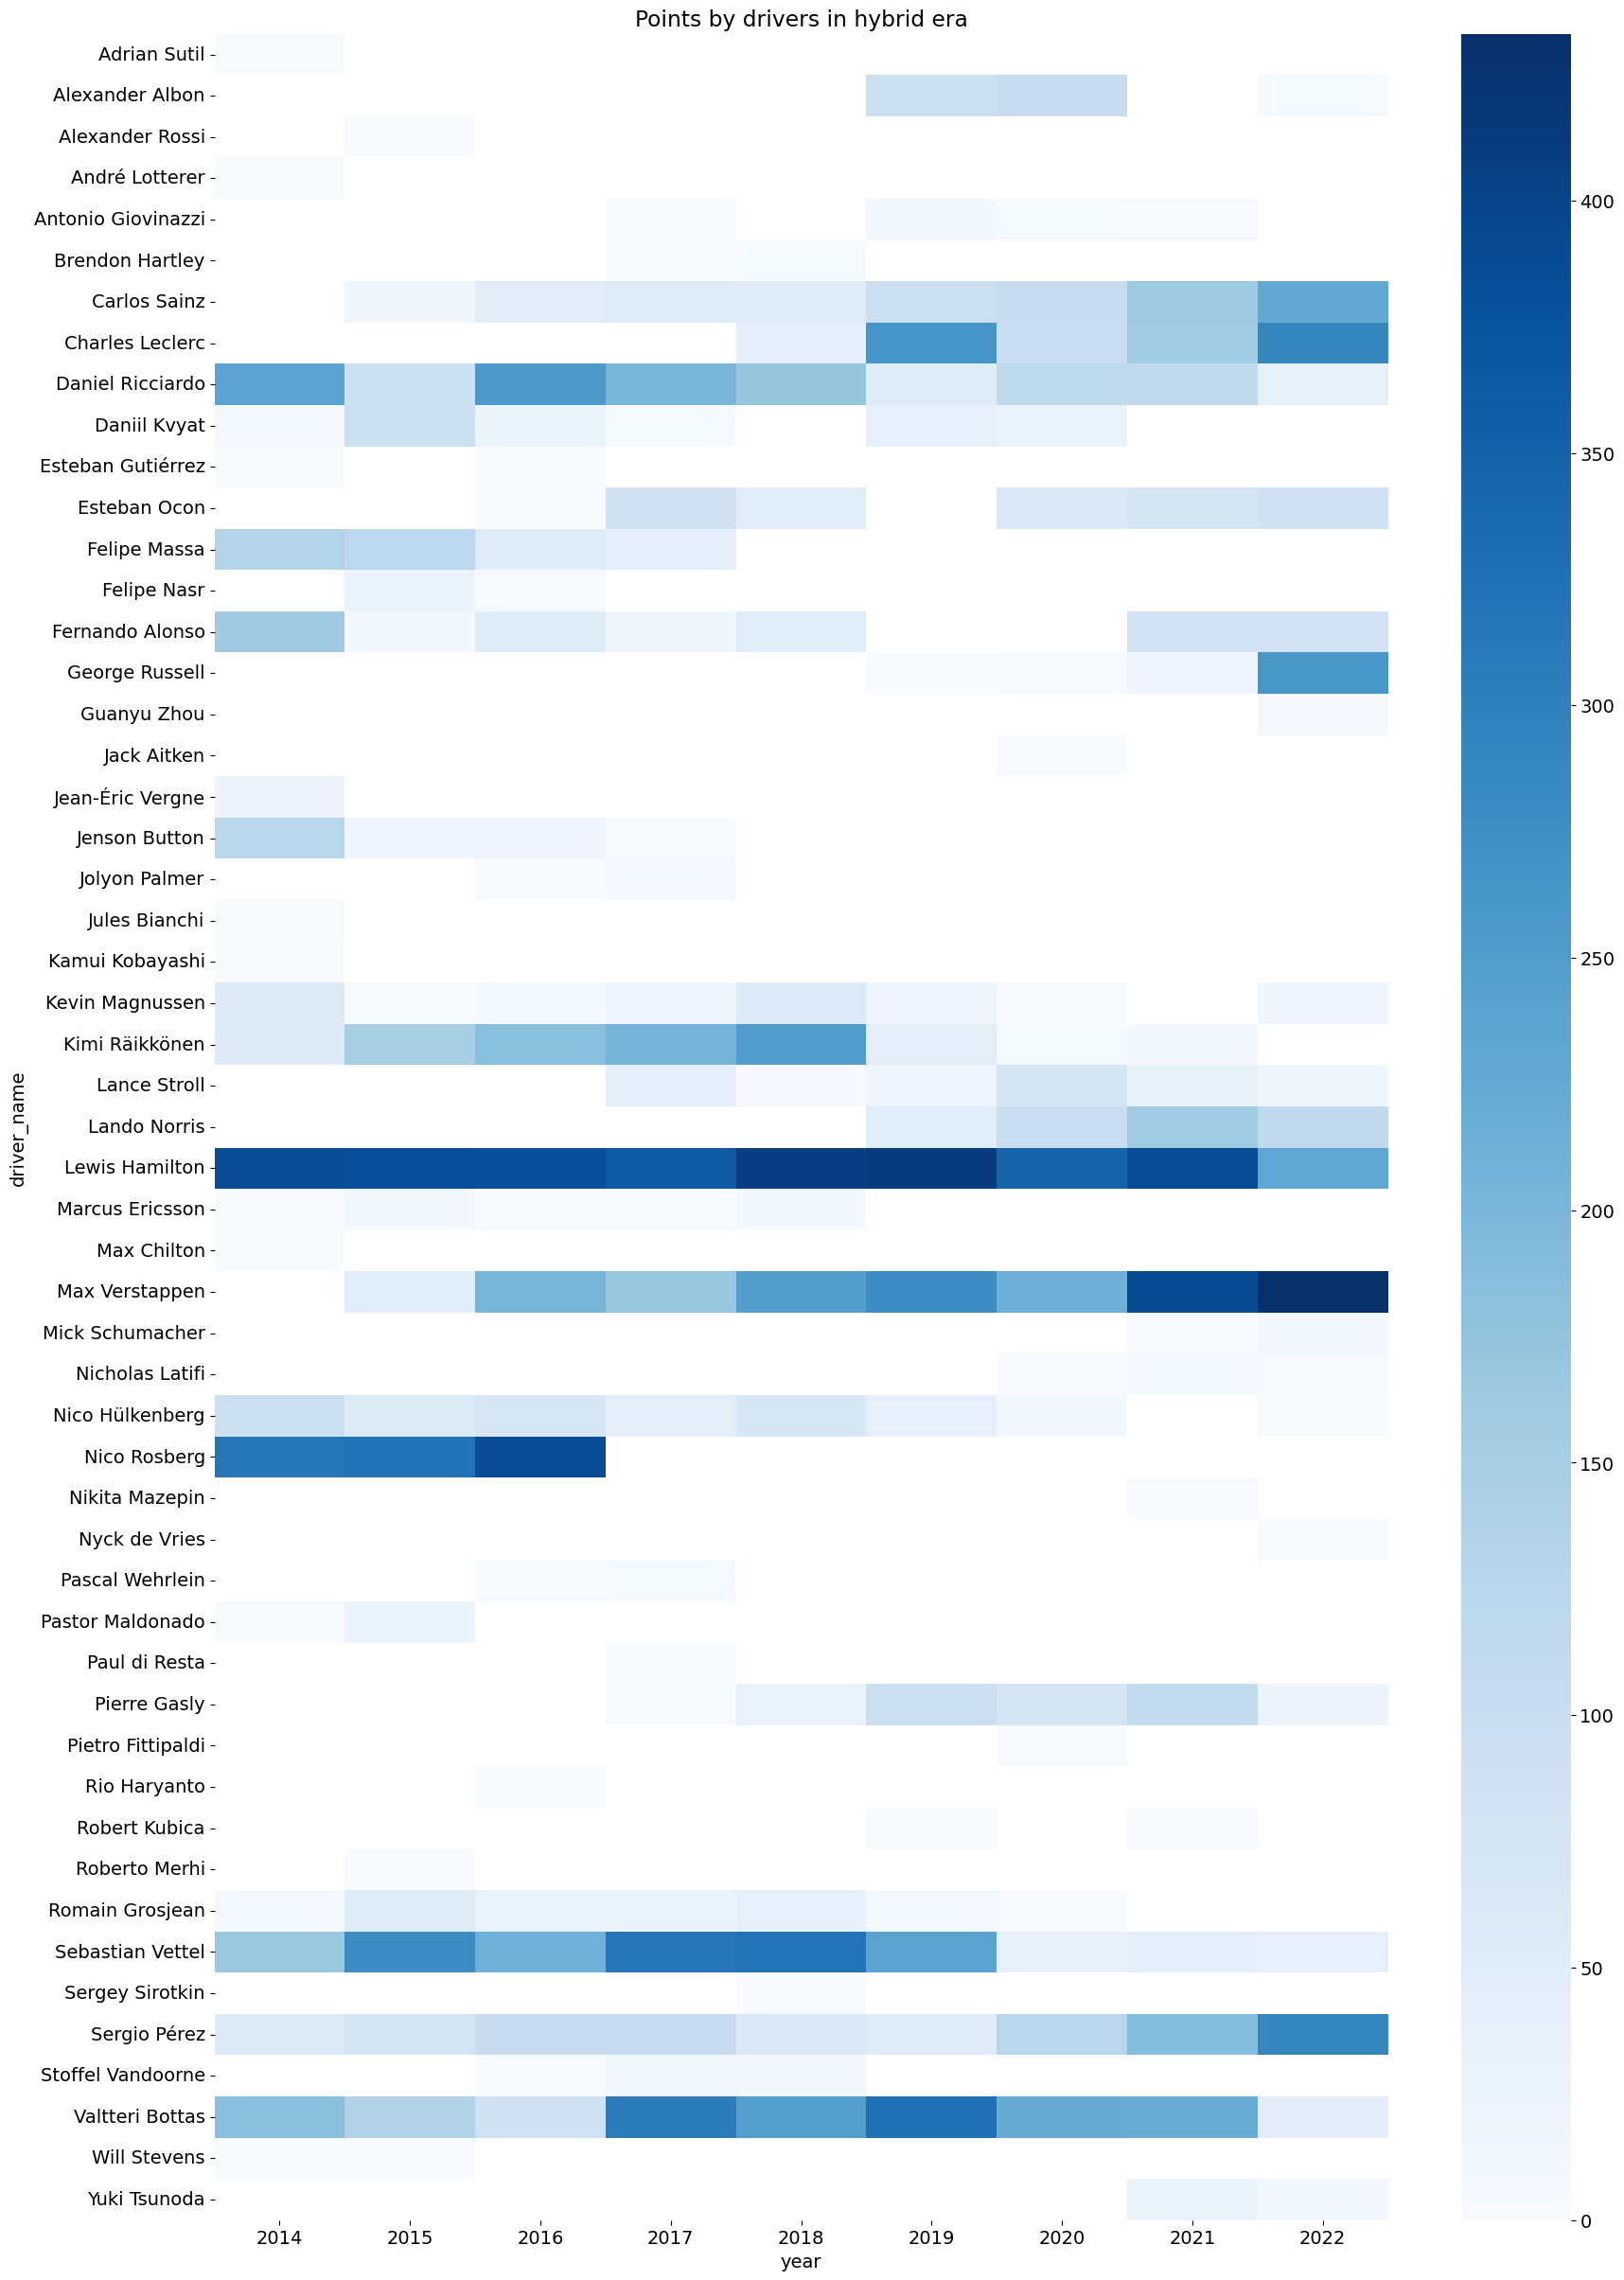

In [156]:
plt.figure(figsize = (20,30))
plt.title("Points by drivers in hybrid era")
sns.heatmap(hybrid_era_results1, cmap = 'Blues')

## Inferences and Conclusion

### In this data analysis project, I have conducted several basic analyses of the F1 data, ranging from comparing the drivers and teams who have consistently performed at the top level over the years to circuit analysis. Our findings suggest that drivers such as Lewis Hamilton, Michael Schumacher, Fernando Alonso, and Sebastian Vettel, as well as constructor teams like Ferrari, Mercedes, and Redbull, have consistently featured at the top in most of the analyses we conducted. These results imply that these players are integral to the Formula One ecosystem.

### Moving forward, there is still ample opportunity to conduct further analyses on this Formula One data, such as analyzing driver age, constructor base countries, as well as conducting more in-depth lap time analyses. I hope to explore these avenues of research in future analyses.